In [28]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Activation
from keras.models import Sequential
from matplotlib import pyplot as plt

# load the Reuters dataset

In [29]:
(X_train,y_train), (X_test, y_test) = reuters.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [30]:
X

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [31]:
y

array([ 3,  4,  3, ...,  3,  3, 24], dtype=int64)

In [32]:
print("Training data:")
print(X.shape)
print(y.shape)

Training data:
(11228,)
(11228,)


In [33]:
print("Classes:")
print(np.unique(y))

Classes:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [34]:
print("Number of words:")
print(len(np.unique(np.hstack(X))))

Number of words:
30980


In [35]:
print("Review length:")
result=[len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result),np.std(result)))

Review length:
Mean 145.96 words (145.878476)


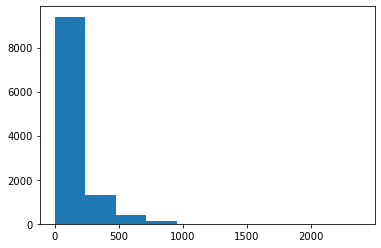

In [42]:
plt.hist(result)
plt.show()

In [43]:
num_words=1000
tokenizer=Tokenizer (num_words=num_words)
X_train=tokenizer.sequences_to_matrix(X_train,mode='binary')
X_test=tokenizer.sequences_to_matrix(X_test,mode='binary')

In [46]:
num_classes=np.max(y_train)+1
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [49]:
model=Sequential()
model.add(Dense(512,input_shape=(num_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________


In [50]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [52]:
model.fit(X_train,y_train,epochs=2,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/2
281/281 [==============================] - 3s 7ms/step - loss: 1.2445 - accuracy: 0.7271 - val_loss: 0.9380 - val_accuracy: 0.7907
Epoch 2/2
281/281 [==============================] - 2s 7ms/step - loss: 0.5899 - accuracy: 0.8632 - val_loss: 0.8542 - val_accuracy: 0.8019


In [53]:
scores=model.evaluate(X_test,y_test,batch_size=32)
print("Accuracy:",scores[1])

71/71 [==============================] - 0s 3ms/step - loss: 0.8542 - accuracy: 0.8019
Accuracy: 0.8018699884414673


In [54]:
prediction=model.predict(X_test)

71/71 [==============================] - 0s 2ms/step


In [56]:
print(prediction)

[[6.92883259e-05 2.70742370e-04 1.32113155e-05 ... 2.32321781e-05
  2.09040559e-06 9.68584118e-06]
 [4.00290155e-04 1.08231204e-02 1.39646721e-03 ... 3.88958824e-06
  1.28784461e-06 1.48937588e-05]
 [4.11046552e-04 9.57063198e-01 8.93764896e-04 ... 2.30516525e-05
  9.57150696e-05 1.31336288e-04]
 ...
 [4.95513923e-05 1.00013311e-03 1.99856338e-04 ... 5.87877512e-05
  4.63530705e-05 4.05073588e-05]
 [1.67420972e-03 3.12756002e-02 5.76240616e-03 ... 2.67560041e-04
  1.86827878e-04 1.06740947e-04]
 [2.14609943e-04 3.43775511e-01 7.73900701e-03 ... 2.00109163e-04
  2.37775603e-04 1.63953868e-04]]
